<a href="https://colab.research.google.com/github/glaubermateus/Ciencia_De_Dados/blob/main/1-classificacao/1-emprestimo/Projeto_Classificacao_Emprestimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING - CLASSIFICAÇÃO**

**Informações sobre o data set**

- **Loan_ID**: ID de empréstimo exclusivo.
- **Gender**: Gênero (masculino / feminino).
- **Married**: Casado (sim) ou Não casado (Não).
- **Dependents**: Número de pessoas dependendo do cliente.
- **Education**: Educação do Candidato (Graduado ou Não Graduado).
- **Self_Employed**: Autônomo (Sim/Não).
- **ApplicantIncome**: Renda do candidato.
- **CoapplicantIncome**: Renda do co-requerente.
- **LoanAmount**: Valor do empréstimo em milhares.
- **Loan_Amount_Term**: Prazos do empréstimo em meses.
- **Credit_History**: Se o histórico de crédito atende às diretrizes (Sim ou Não)
- **Property_Area**: Local de residência dos candidatos (zona urbana, semi-urbana ou rural)
- **Loan_Status**: Empréstimo aprovado (S/N).

## 1. Análise Exploratória dos dados

In [ ]:
# Importação dos pacotes para importação, manipulação e visualização dos dados
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Carregamento dos pacotes para pré processamento e machine learning
from sklearn.model_selection import train_test_split # Divisão dos dados em treino e teste
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler # Padronização
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Importação do dataset
from google.colab import files
upload = files.upload()

Saving loan_data.csv to loan_data.csv


In [ ]:
# Importação do dataset
df = pd.read_csv('/content/loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
# Verificando a dimensão dos dados
df.shape

(381, 13)

In [ ]:
# Renomear Colunas
colunas = ['id','genero','casado','dependentes','educacao','autonomo','renda_requerente','renda_corequerente','valor_emprestimo','tempo_emprestimo','historico_credito','propriedade','status']
df.columns = colunas

In [ ]:
# Vendo informações gerais do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  381 non-null    object 
 1   genero              376 non-null    object 
 2   casado              381 non-null    object 
 3   dependentes         373 non-null    object 
 4   educacao            381 non-null    object 
 5   autonomo            360 non-null    object 
 6   renda_requerente    381 non-null    int64  
 7   renda_corequerente  381 non-null    float64
 8   valor_emprestimo    381 non-null    float64
 9   tempo_emprestimo    370 non-null    float64
 10  historico_credito   351 non-null    float64
 11  propriedade         381 non-null    object 
 12  status              381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
# Checando duplicidade de valores
df.duplicated().sum()

np.int64(0)

In [ ]:
# Verificando valores ausentes do df
valores_na = df.isna().sum()
valores_na.sort_values(ascending=False)

,0
historico_credito,30
autonomo,21
tempo_emprestimo,11
dependentes,8
genero,5
educacao,0
casado,0
id,0
renda_requerente,0
valor_emprestimo,0


In [ ]:
# % de Valores ausentes
valores_na_percent = (valores_na / df.shape[0])*100
valores_na_percent.sort_values(ascending = False)

,0
historico_credito,7.874016
autonomo,5.511811
tempo_emprestimo,2.887139
dependentes,2.099738
genero,1.312336
educacao,0.000000
casado,0.000000
id,0.000000
renda_requerente,0.000000
valor_emprestimo,0.000000


In [ ]:
# Visualizando as colunas
df.columns

Index(['id', 'genero', 'casado', 'dependentes', 'educacao', 'autonomo',
       'renda_requerente', 'renda_corequerente', 'valor_emprestimo',
       'tempo_emprestimo', 'historico_credito', 'propriedade', 'status'],
      dtype='object')

In [ ]:
# Separando as features por tipagem de dados (exclusao de id)
numericas = ['renda_requerente','renda_corequerente','valor_emprestimo','tempo_emprestimo']
categoricas = ['genero','dependentes','casado','educacao','autonomo','historico_credito','propriedade','status']

In [ ]:
# Contagem de ocorrências agrupando pelas features categoricas
espaco = '-'*30
for c in categoricas:
  print(df[c].value_counts())
  print(espaco)

genero
Male      291
Female     85
Name: count, dtype: int64
------------------------------
dependentes
0     234
2      59
1      52
3+     28
Name: count, dtype: int64
------------------------------
casado
Yes    228
No     153
Name: count, dtype: int64
------------------------------
educacao
Graduate        278
Not Graduate    103
Name: count, dtype: int64
------------------------------
autonomo
No     325
Yes     35
Name: count, dtype: int64
------------------------------
historico_credito
1.0    294
0.0     57
Name: count, dtype: int64
------------------------------
propriedade
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64
------------------------------
status
Y    271
N    110
Name: count, dtype: int64
------------------------------


In [ ]:
# Verificando resumo estatístico
df['numericas'].describe()

,renda_requerente,renda_corequerente,valor_emprestimo,tempo_emprestimo,historico_credito
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


Através do resumo estatístico, é possível perceber a existência de outliers nas variáveis numéricas, uma vez que o valor máximo está distante das medidas centrais (média e mediana).

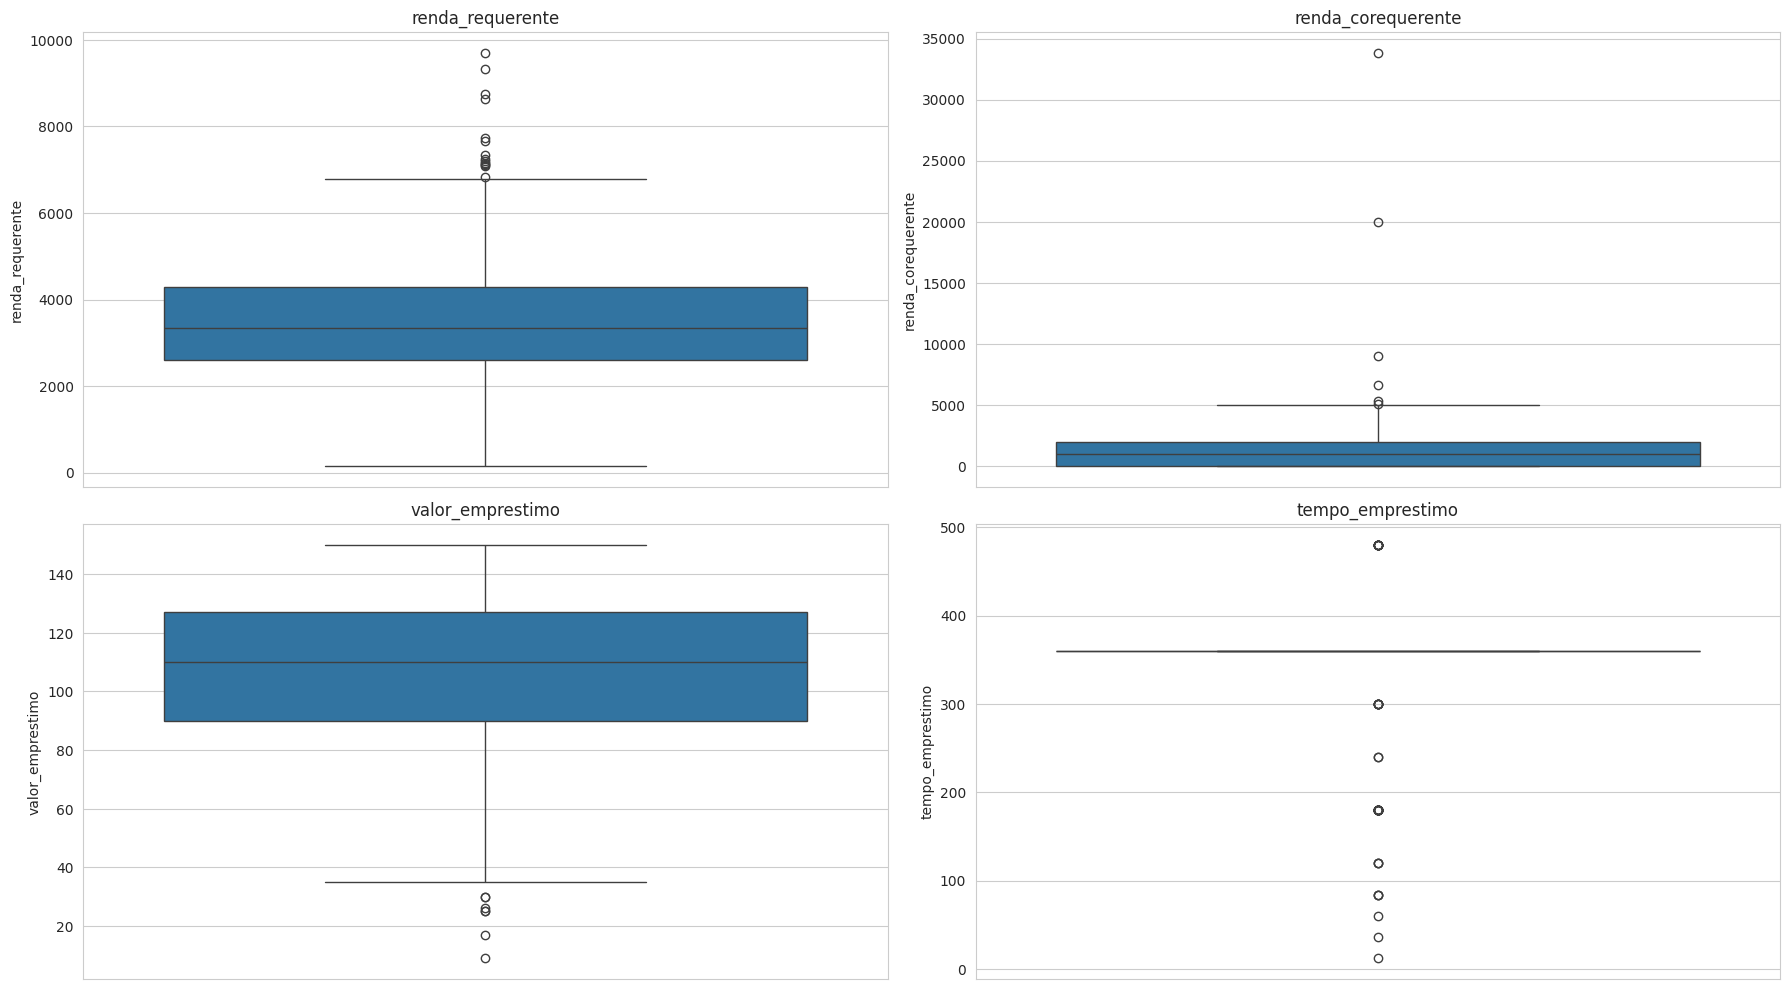

In [ ]:
# Verificando o boxplot das variáveis numéricas para verificar possíveis oultliers
fig, axes = mpl.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

for i, column in enumerate(numericas):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_title(f'{column}')

mpl.tight_layout()
mpl.show()

In [ ]:
# Visualizando contagem de valores da coluna tempo_emprestimo
df.tempo_emprestimo.value_counts()

,count
tempo_emprestimo,
360.0,312
180.0,29
480.0,11
300.0,7
120.0,3
84.0,3
240.0,2
60.0,1
12.0,1


In [ ]:
# Outliers (excluindo da feature 'tempo_emprestimo')
atributos = [c for c in numericas if c not in 'tempo_emprestimo']
novo_df = df[atributos]
Q1 = novo_df.quantile(0.25)
Q3 = novo_df.quantile(0.75)
IQR = Q3-Q1
linf = Q1 - 1.5 * IQR
lsup = Q3 + 1.5 * IQR

In [ ]:
# Definindo os outliers conforme IQR
outliers = ( (novo_df < linf) | (novo_df > lsup) ).sum()

In [ ]:
# Visualizando os outliers
outliers

,0
renda_requerente,14
renda_corequerente,6
valor_emprestimo,7


In [ ]:
# Criando um dataframe com os outliers
outliers_df = pd.DataFrame({'outliers': outliers, 'Percentual': (outliers / len(novo_df))*100})
outliers_df

,outliers,Percentual
renda_requerente,14,3.674541
renda_corequerente,6,1.574803
valor_emprestimo,7,1.837270


In [ ]:
# Excluindo os outliers
df_sem_outliers = df[~((novo_df < linf) | (novo_df > lsup)).any(axis = 1)]
df_sem_outliers.head()

,id,genero,casado,dependentes,educacao,autonomo,renda_requerente,renda_corequerente,valor_emprestimo,tempo_emprestimo,historico_credito,propriedade,status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
# Shape
df_sem_outliers.shape

(354, 13)

In [ ]:
# Valores ausentes
df_sem_outliers.isna().sum().sort_values(ascending = False)

,0
id,0
genero,5
casado,0
dependentes,8
educacao,0
autonomo,20
renda_requerente,0
renda_corequerente,0
valor_emprestimo,0
tempo_emprestimo,10


In [ ]:
# df sem NA
df_sem_na = df_sem_outliers.dropna()

In [ ]:
# Shape
df_sem_na.shape

(285, 13)

In [ ]:
# Valores ausentes
df_sem_na.isna().sum().sum()

np.int64(0)

---

## 2. Pré Processamento dos dados

In [ ]:
# Verificando os tipos dos dados
df_sem_na.dtypes

,0
id,object
genero,object
casado,object
dependentes,object
educacao,object
autonomo,object
renda_requerente,int64
renda_corequerente,float64
valor_emprestimo,float64
tempo_emprestimo,float64


In [ ]:
# Dropar variavel id
df_final = df_sem_na.drop(columns=['id'], axis = 1)

In [ ]:
# Alterando os valores para converter para inteiro

mapeamentos = {
    'genero': {
        'Male': '0',
        'Female': '1'
    },
    'casado': {
        'Yes': '1',
        'No': '0'
    },
    'dependentes': {
        '0': '0',
        '1': '1',
        '2': '1',
        '3+': '1'
    },
    'educacao': {
        'Graduate': '1',
        'Not Graduate': '0'
    },
    'autonomo': {
        'No': '0',
        'Yes':'1'
    },
    'propriedade': {
        'Rural':'0',
        'Semiurban':'1',
        'Urban':'2'
    },
    'status': {
        'N':'0',
        'Y':'1'
    }
}

# Aplicando todos os mapeamentos de uma vez
df_final.replace(mapeamentos, inplace=True)

In [ ]:
# Alterando de str para int
atributos = [c for c in categoricas if c not in 'historico_credito']
print(atributos)
for c in atributos:
  df_final[c] = df_final[c].astype(int)

['genero', 'dependentes', 'casado', 'educacao', 'autonomo', 'propriedade', 'status']


In [ ]:
# Verificando os tipos dos dados
df_final.dtypes

,0
genero,int64
casado,int64
dependentes,int64
educacao,int64
autonomo,int64
renda_requerente,int64
renda_corequerente,float64
valor_emprestimo,float64
tempo_emprestimo,float64
historico_credito,float64


In [ ]:
# Separar as variáveis em preditoras e target
X = df_final.drop('status', axis = 1)
y = df_final['status']

In [ ]:
# Dividindo os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Inicializando o RF para identificar as variáveis mais relevantes
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

In [ ]:
# Previsoes
y_pred = modelo.predict(X_teste)

In [ ]:
# Avaliação do modelo pela acurácia
acc = accuracy_score(y_teste, y_pred)
print(f'Acuracia: {acc:.4f}')

Acuracia: 0.8372


In [ ]:
# Identificando as variaveis mais relevantes
importancias = modelo.feature_importances_
colunas = X.columns
importancias_df = pd.DataFrame({'Variavel': colunas, 'Importancia': importancias}).sort_values(by = 'Importancia', ascending = False)

In [ ]:
# Visualizando o dataframe
importancias_df

,Variavel,Importancia
9,historico_credito,0.282017
5,renda_requerente,0.200490
7,valor_emprestimo,0.176349
6,renda_corequerente,0.087098
8,tempo_emprestimo,0.056449
10,propriedade,0.053699
0,genero,0.036872
1,casado,0.036288
3,educacao,0.026120
2,dependentes,0.025412


In [ ]:
# Capturando os atributos com importancia maior ou igual a 0.05
filtro = importancias_df[importancias_df.Importancia >= 0.05]
atributos = filtro.loc[:,'Variavel'].to_list()
print(atributos)

['historico_credito', 'renda_requerente', 'valor_emprestimo', 'renda_corequerente', 'tempo_emprestimo', 'propriedade']


In [ ]:
# Selecionando as variaveis no dataframe
X = X[atributos]

In [ ]:
# Separando os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
# Aplicando a normalização - StandardScaler
sc = StandardScaler()
sc.fit(X_treino)
X_treino_sc = sc.transform(X_treino)
X_teste_sc = sc.transform(X_teste)

---

## 3. Modelagem Preditiva


Modelo:  Logistic Regression

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.90      0.56      0.69        32
           1       0.79      0.96      0.87        54

    accuracy                           0.81        86
   macro avg       0.84      0.76      0.78        86
weighted avg       0.83      0.81      0.80        86


--- CONFUSION MATRIX ---


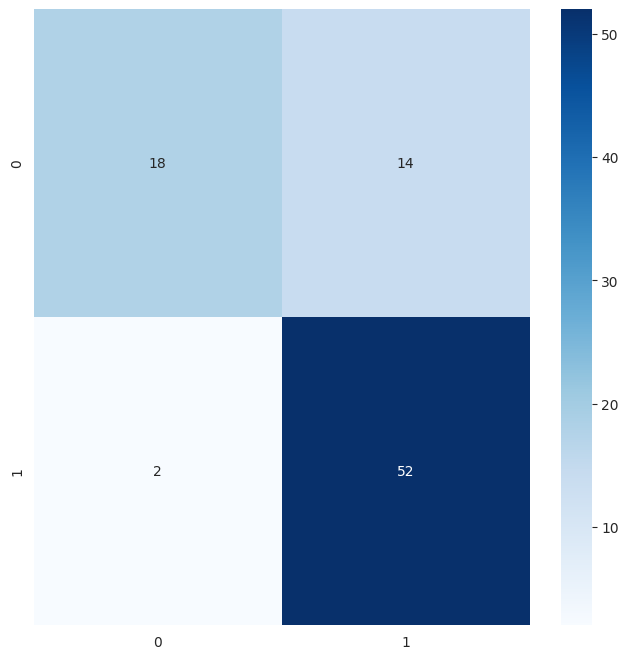


Modelo:  Random Forest

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        32
           1       0.84      0.94      0.89        54

    accuracy                           0.85        86
   macro avg       0.86      0.82      0.83        86
weighted avg       0.85      0.85      0.84        86


--- CONFUSION MATRIX ---


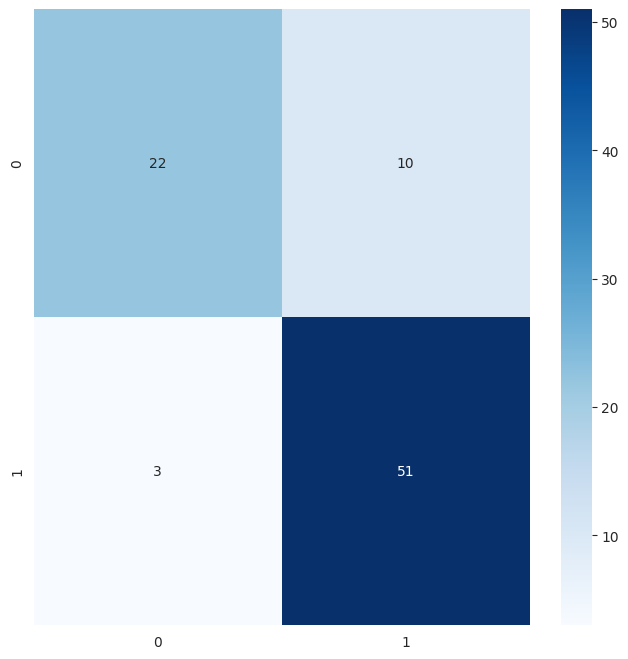


Modelo:  Ada Boost

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.59      0.70        32
           1       0.80      0.94      0.86        54

    accuracy                           0.81        86
   macro avg       0.83      0.77      0.78        86
weighted avg       0.82      0.81      0.80        86


--- CONFUSION MATRIX ---


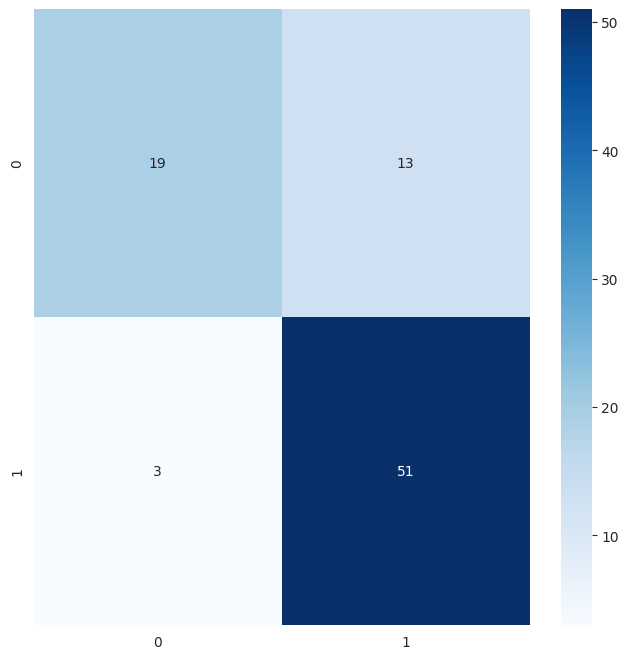


Modelo:  Decision Tree

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        32
           1       0.81      0.81      0.81        54

    accuracy                           0.77        86
   macro avg       0.75      0.75      0.75        86
weighted avg       0.77      0.77      0.77        86


--- CONFUSION MATRIX ---


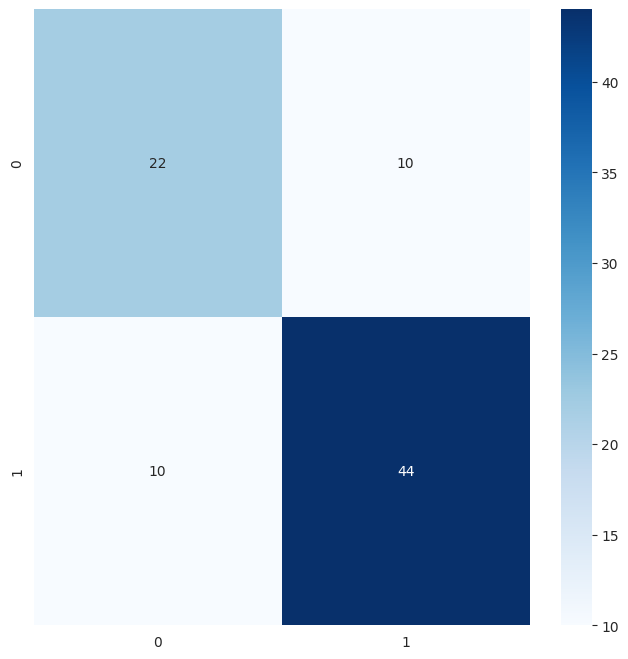


Modelo:  K-Nearest Neighbors

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        32
           1       0.81      0.93      0.86        54

    accuracy                           0.81        86
   macro avg       0.82      0.78      0.79        86
weighted avg       0.82      0.81      0.81        86


--- CONFUSION MATRIX ---


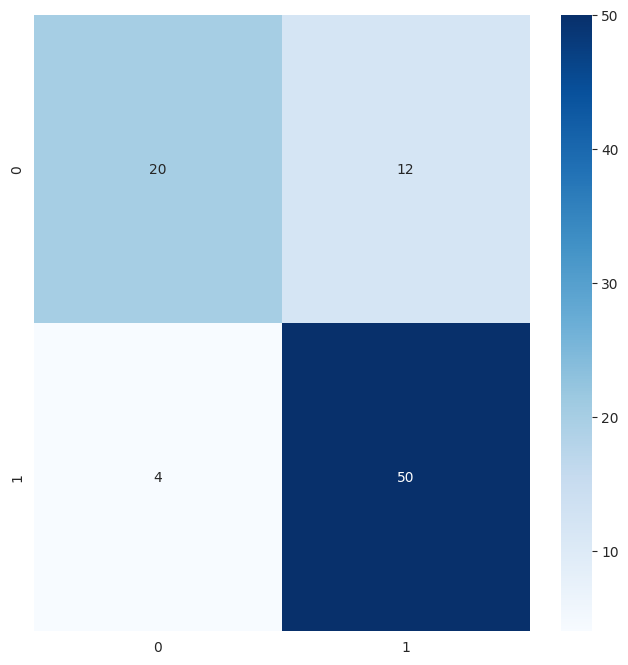

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_treino_sc, y_treino)
    # predicao treino
    preds_treino = model.predict(X_treino_sc)
    acc_treino = accuracy_score(y_treino, preds_treino)
    results.append({'Modelo': name, 'Tipo': 'Treino', 'Acuracia': acc_treino})

    # predicao teste
    preds_teste = model.predict(X_teste_sc)
    acc_teste = accuracy_score(y_teste, preds_teste)
    results.append({'Modelo': name, 'Tipo': 'Teste', 'Acuracia': acc_teste})
    print('\nModelo: ',name)
    print('\n--- CLASSIFICATION REPORT ---')
    print(classification_report(y_teste, preds_teste))
    print('\n--- CONFUSION MATRIX ---')
    confusao = confusion_matrix(y_teste, preds_teste)
    mpl.figure(figsize = (8,8))
    sns.heatmap(confusao, annot = True, cmap = 'Blues')
    mpl.show()

In [ ]:
# Dataframe com os modelos
df_resultados = pd.DataFrame(results)

In [ ]:
# Visualizacao do dataframe
df_resultados.sort_values(by = ['Tipo', 'Acuracia'], ascending = False)

,Modelo,Tipo,Acuracia
2,Random Forest,Treino,1.000000
6,Decision Tree,Treino,1.000000
0,Logistic Regression,Treino,0.849246
4,Ada Boost,Treino,0.849246
8,K-Nearest Neighbors,Treino,0.844221
3,Random Forest,Teste,0.825581
1,Logistic Regression,Teste,0.813953
5,Ada Boost,Teste,0.813953
9,K-Nearest Neighbors,Teste,0.813953
7,Decision Tree,Teste,0.697674
